###### Introduction to Network Analysis 2023/24 (xii)

## Random-walk sampling, network comparison

### III. Networks and models comparison

You are given three social networks and three food web graphs in Pajek format.

+ Zachary karate club network ([karate_club.net](http://lovro.fri.uni-lj.si/ina/nets/karate_club.net))
+ Davis southern women network ([southern_women.net](http://lovro.fri.uni-lj.si/ina/nets/southern_women.net))
+ Lusseau bottlenose dolphins network ([dolphins.net](http://lovro.fri.uni-lj.si/ina/nets/dolphins.net))

<span/>

+ Little Rock Lake food web ([foodweb_littlerock.net](http://lovro.fri.uni-lj.si/ina/nets/foodweb_littlerock.net))
+ Cypress Wetlands food web (dry) ([foodweb_baydry.net](http://lovro.fri.uni-lj.si/ina/nets/foodweb_baydry.net))
+ Cypress Wetlands food web (wet) ([foodweb_baywet.net](http://lovro.fri.uni-lj.si/ina/nets/foodweb_baywet.net))



1. **(discuss)** Consider different approaches for comparing networks. These include comparing networks by different metrics or statistics, graph edit distance, graphlet degree distribution agreement, portrait divergence, $D$-measure etc. You can implement the approaches by yourself, browse your network library for existing implementations or use the code provided below.

	+ Simplified $D$-measure: [simplified_dmeasure.py](http://lovro.fri.uni-lj.si/ina/code/simplified_dmeasure.py)
	+ Network portrait divergence: [portrait_divergence.py](http://lovro.fri.uni-lj.si/ina/code/portrait_divergence.py)
	+ Graphlet distribution agreement: [graphlet_aggrement.py](http://lovro.fri.uni-lj.si/ina/code/graphlet_aggrement.py)

	Note that the last script requires a working installation of the [orca](https://github.com/thocevar/orca) algorithm for counting graphlet orbits.



- *Simplified $D$-measure* compares distance distributions
- *Portrait divergence* is an information-theoretic distance between the graph's *portraits*. These are simply matrices $B$ defined as $B_{\ell,k} =$ the number of nodes who have $k$ nodes at distance $\ell$ (with appropriate distance binning for weighted networks). See [An information-theoretic, all-scales approach to comparing networks](https://arxiv.org/abs/1804.03665) by Bollt and Bagrow (provided code's author) for details.
- *Graphlet degree distribution agreement* measures the similarity of graphlet orbit distributions
- *Graph edit distance* measures the minimal number of edit operations (eg. add/remove/edit a node or an edge) that makes the graphs isomorphic. However, it is computationaly intractable for general graphs (`nx` [implementation](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.similarity.graph_edit_distance.html) may take an hour even for $n=10$)

2. **(code)** Compare the networks between each other and plot their dissimilarity or distances with a heat map. How similar are networks of different type? For instance, are social networks more similar to each other than to food webs? Does the answer depend on the selected measure of dissimilarity or distance?



In [ ]:
# see code-block below for implementation

We want these measures to differentiate well between social networks (with community structure) and foodwebs (with hierarhical structure). Recall that food webs denote *who eats who*, se we have layers with predators on top, prey below, grass at the bottom etc.

From the generated heatmaps (*see* end of notebook), we can see:
- Graphlet distribution agreement fails to differentiate well betwen social networks and foodwebs
- $D$-measure is a bit better at grouping food webs together, but still struggles with social networks
- Portrait divergence gives very good results, clearly seperating these 2 classes of networks

3. **(code)** Compare the networks also to small synthetic graphs such as Erd&ouml;s-R&eacute;nyi random graphs, Barab&aacute;si-Albert scale-free graphs and Watts-Strogatz small-world graphs with $n=500$ nodes and $m=1500$ edges. How similar are real networks to synthetic graphs? How do synthetic graphs compare between each other?

In [ ]:
import utils
import networkx as nx

# import sys; sys.path.append( "../vaje/labs/labs/xii/code/")
import portrait_divergence as pd
import simplified_dmeasure as dm
import graphlet_aggrement as ga

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap


def map(Gs, Ds, label):
    fig = plt.figure()

    plt.imshow(Ds, cmap=LinearSegmentedColormap.from_list(
        '', ['yellow', 'gray', 'white']))

    for i in range(len(Gs)):
        for j in range(len(Gs)):
            plt.text(j, i, "{:.2f}".format(
                Ds[i][j]), ha='center', va='center', fontsize=4)

    plt.title(label)
    plt.xticks(ticks=[])
    plt.yticks(ticks=range(len(Gs)), labels=[G.name for G in Gs], fontsize=7)

    clb = plt.colorbar()
    clb.ax.tick_params(labelsize=7)

    fig.savefig(label + ".pdf", bbox_inches='tight')
    plt.close(fig)


def dists(Gs, measure):
    Ds = [[0] * len(Gs) for _ in range(len(Gs))]

    for i in range(len(Gs)):
        for j in range(i, len(Gs)):
            Ds[i][j] = measure(Gs[i], Gs[j])
            Ds[j][i] = Ds[i][j]

    return Ds


MEASURES = {
    "dmeasure": dm.dmeasure,
    "portraits": pd.portrait_divergence,
    "graphlets": ga.graphlet_disaggrement,
    # "edit": nx.algorithms.similarity.graph_edit_distance,
}

Gs = []
for name in ["karate_club", "southern_women", "dolphins", "foodweb_littlerock", "foodweb_baydry", "foodweb_baywet"]:
    G = utils.read_pajek(name)
    Gs.append(G)

    utils.info(G)

for i in range(3):
    G = nx.gnm_random_graph(500, 1500)
    G.name = "erdos_renyi_" + str(i + 1)
    Gs.append(G)

    if i == 0:
        utils.info(G)

for i in range(3):
    G = nx.barabasi_albert_graph(500, 3)
    G.name = "barabasi_albert_" + str(i + 1)
    Gs.append(G)

    if i == 0:
        utils.info(G)

for i in range(3):
    G = nx.watts_strogatz_graph(500, 6, 0.1)
    G.name = "watts_strogatz_" + str(i + 1)
    Gs.append(G)

    if i == 0:
        utils.info(G)

for label, measure in MEASURES.items():
    Ds = dists(Gs, measure)
    map(Gs, Ds, label)


  MultiGraph | 'karate_club'
       Nodes | 34 (iso=0)
       Edges | 78 (loop=0)
      Degree | 4.59 (max=17)
         LCC | 100.0% (n=1)

  MultiGraph | 'southern_women'
       Nodes | 32 (iso=0)
       Edges | 89 (loop=0)
      Degree | 5.56 (max=14)
         LCC | 100.0% (n=1)

  MultiGraph | 'dolphins'
       Nodes | 62 (iso=0)
       Edges | 159 (loop=0)
      Degree | 5.13 (max=12)
         LCC | 100.0% (n=1)

MultiDiGraph | 'foodweb_littlerock'
       Nodes | 183 (iso=0)
       Edges | 2,494 (loop=18)
      Degree | 13.63 max(in=102, out=63)
         LCC | 100.0% (n=1)

MultiDiGraph | 'foodweb_baydry'
       Nodes | 128 (iso=0)
       Edges | 2,137 (loop=0)
      Degree | 16.70 max(in=110, out=63)
         LCC | 100.0% (n=1)

MultiDiGraph | 'foodweb_baywet'
       Nodes | 128 (iso=0)
       Edges | 2,106 (loop=0)
      Degree | 16.45 max(in=110, out=62)
         LCC | 100.0% (n=1)

       Graph | 'erdos_renyi_1'
       Nodes | 500 (iso=2)
       Edges | 1,500 (loop=0)
      Deg

Graphlet distribution agreement and $D$-measure are quite good at distinguishing between types of synthetic graphs, though they barely find the difference between Erd&ouml;s-R&eacute;nyi and Barab&aacute;si-Albert scale-free graphs. They also report scale-free and small-world networks to be a bit more similar to social networks, which makes sense as these models are designed to imitate their strucutre.

Portrait divergence again gives very good results, clearly separating all 5 groups (though again it struggles somewhat with separating ER from scale-free graphs). This is a good "default" option when we don't know what distance measure to choose.

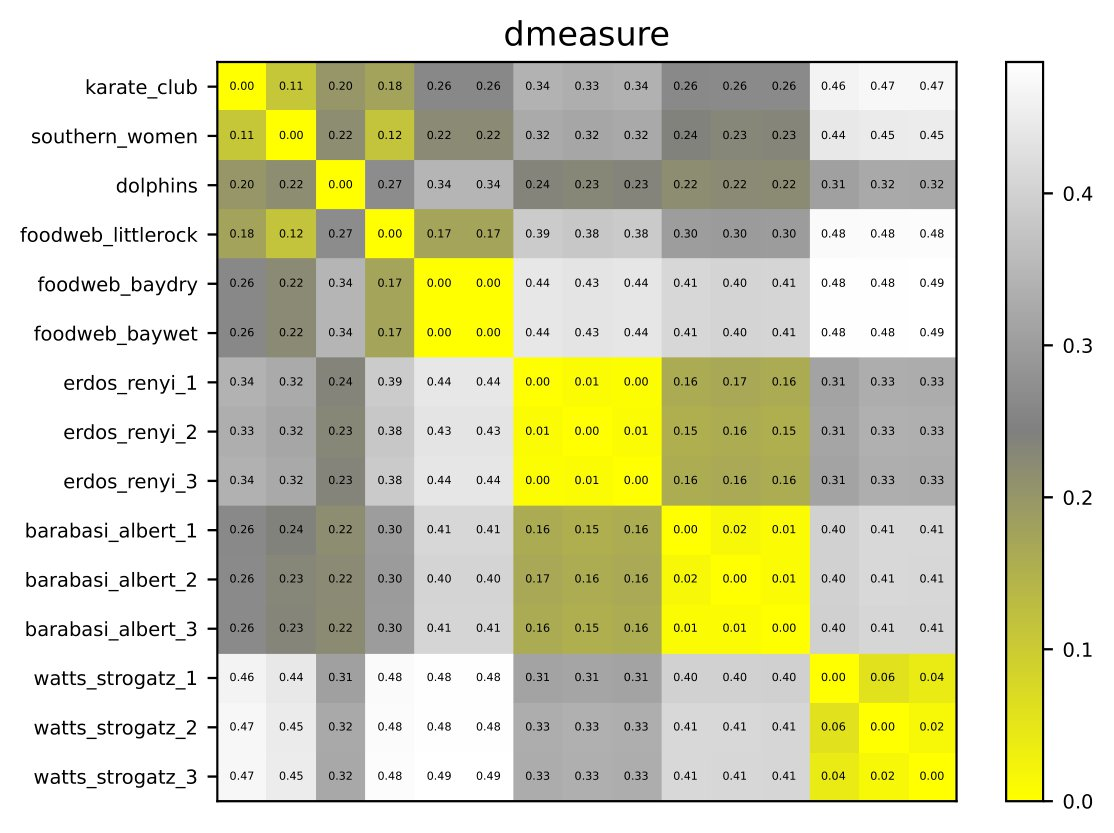

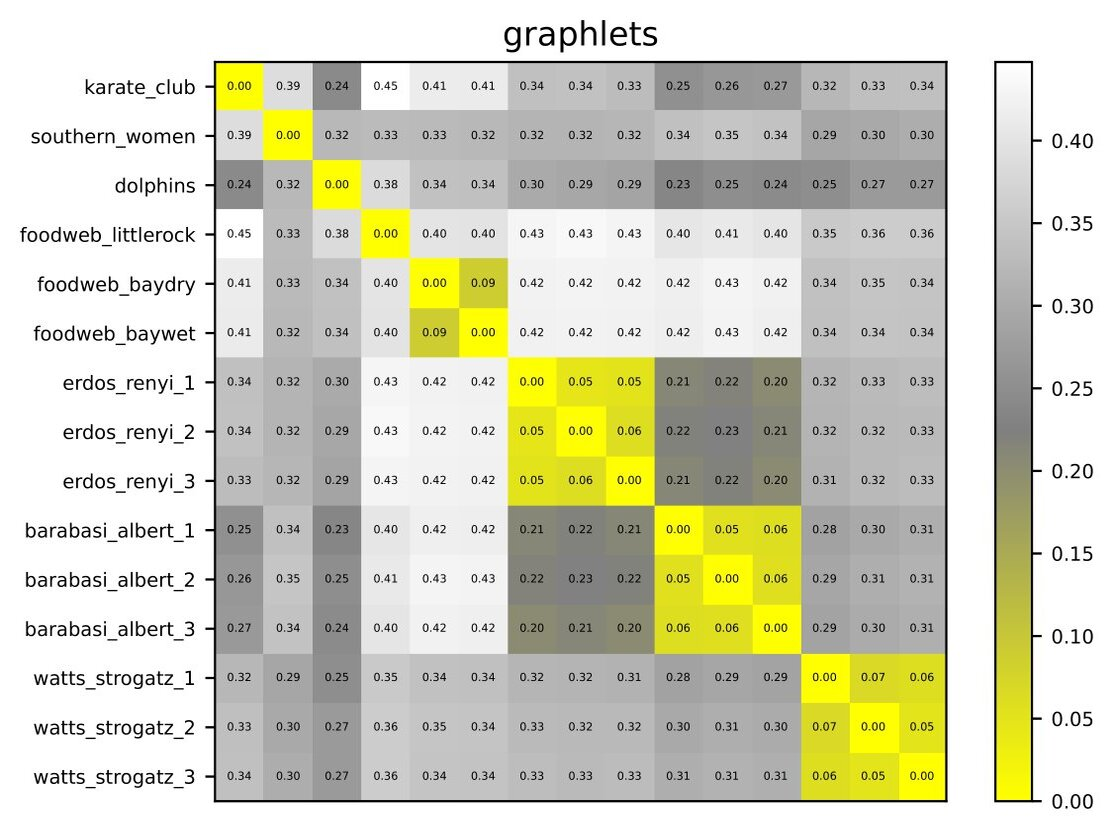

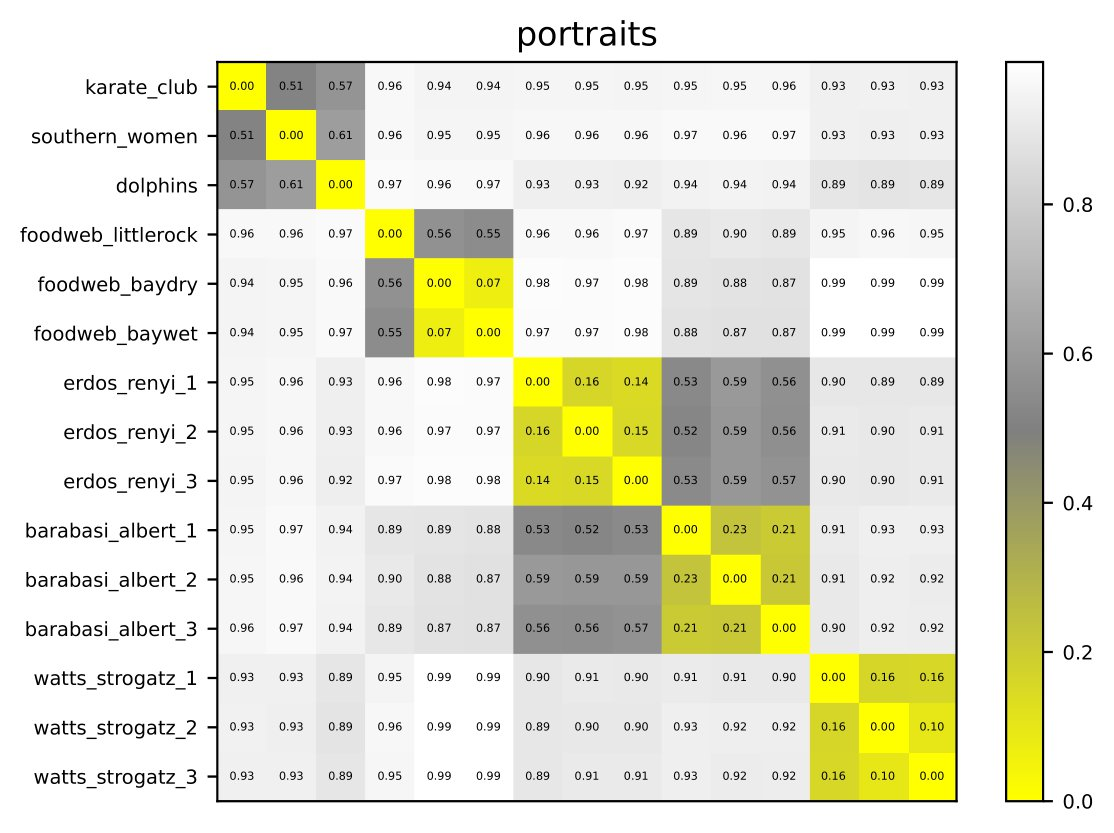